In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Load the dataset
df = pd.read_csv("Malware dataset.csv")  # Update with the correct file path

In [ ]:
# Display basic info
print(df.head())

   millisecond classification  state  usage_counter        prio  static_prio  \
0            0        malware      0              0  3069378560        14274   
1            1        malware      0              0  3069378560        14274   
2            2        malware      0              0  3069378560        14274   
3            3        malware      0              0  3069378560        14274   
4            4        malware      0              0  3069378560        14274   

   normal_prio  policy  vm_pgoff  vm_truncate_count  ...  nivcsw  min_flt  \
0            0       0         0              13173  ...       0        0   
1            0       0         0              13173  ...       0        0   
2            0       0         0              13173  ...       0        0   
3            0       0         0              13173  ...       0        0   
4            0       0         0              13173  ...       0        0   

   maj_flt  fs_excl_counter        lock   utime  stime  

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   millisecond        100000 non-null  int64 
 1   classification     100000 non-null  object
 2   state              100000 non-null  int64 
 3   usage_counter      100000 non-null  int64 
 4   prio               100000 non-null  int64 
 5   static_prio        100000 non-null  int64 
 6   normal_prio        100000 non-null  int64 
 7   policy             100000 non-null  int64 
 8   vm_pgoff           100000 non-null  int64 
 9   vm_truncate_count  100000 non-null  int64 
 10  task_size          100000 non-null  int64 
 11  cached_hole_size   100000 non-null  int64 
 12  free_area_cache    100000 non-null  int64 
 13  mm_users           100000 non-null  int64 
 14  map_count          100000 non-null  int64 
 15  hiwater_rss        100000 non-null  int64 
 16  total_vm           10

In [ ]:
# Handle missing values if any
df = df.dropna()

<ipython-input-8-ca0cc1730373>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='classification', data=df, palette="coolwarm")


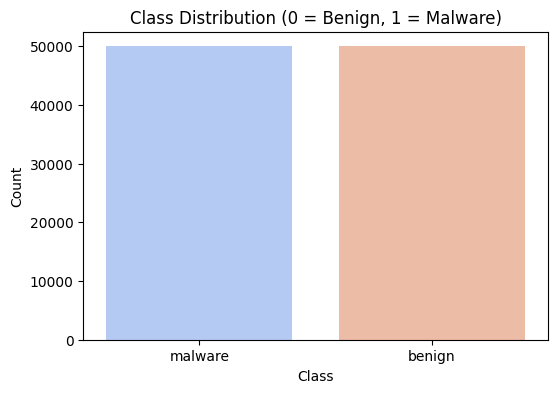

In [ ]:
# Check class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='classification', data=df, palette="coolwarm")
plt.title("Class Distribution (0 = Benign, 1 = Malware)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
# Assuming 'classification' is the target column (adjust if the column is different)
X = df.drop(columns=['classification'])  # Features (all columns except the target)
y = df['classification']  # Target (classification column)

In [ ]:
# Check target value distribution
print(y.value_counts())

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

classification
malware    50000
benign     50000
Name: count, dtype: int64
Training set: (80000, 33), Testing set: (20000, 33)


In [ ]:
# Initialize Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predictions
y_pred = rf_model.predict(X_test)
print("Predictions:")
print(y_pred)

Predictions:
['malware' 'malware' 'benign' ... 'benign' 'benign' 'benign']


In [ ]:
# Evaluate Model
accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy_rf:.4f}")

Model Accuracy: 1.0000


In [ ]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

      benign       1.00      1.00      1.00     10030
     malware       1.00      1.00      1.00      9970

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[10030     0]
 [    0  9970]]


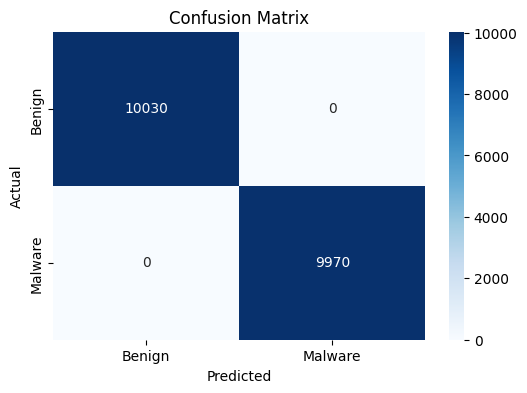

In [ ]:
# Visualizing the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malware'], yticklabels=['Benign', 'Malware'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Predictions
y_pred_svm = svm_model.predict(X_test)
print("SVM Predictions:")
print(y_pred_svm)

SVM Predictions:
['malware' 'malware' 'benign' ... 'benign' 'benign' 'benign']


In [ ]:
# Evaluate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

SVM Accuracy: 0.9478


SVM Classification Report:
               precision    recall  f1-score   support

      benign       0.96      0.94      0.95     10030
     malware       0.94      0.96      0.95      9970

    accuracy                           0.95     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.95      0.95      0.95     20000



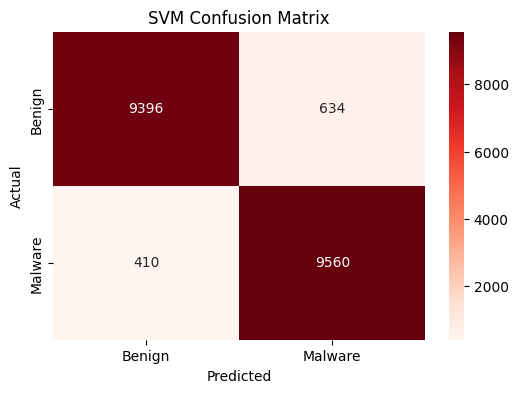

In [ ]:
# Print classification report
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Reds", xticklabels=["Benign", "Malware"], yticklabels=["Benign", "Malware"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()

In [ ]:
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"SVM Accuracy: {accuracy_svm:.4f}")

Random Forest Accuracy: 1.0000
SVM Accuracy: 0.9478


<ipython-input-31-f86a1e50fbc2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="viridis")


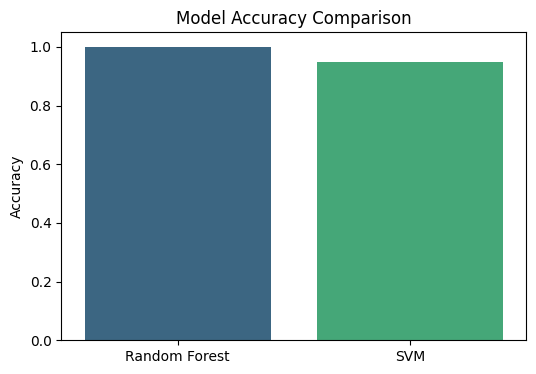

In [ ]:
# Bar chart comparison
models = ["Random Forest", "SVM"]
accuracies = [accuracy_rf, accuracy_svm]

plt.figure(figsize=(6,4))
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

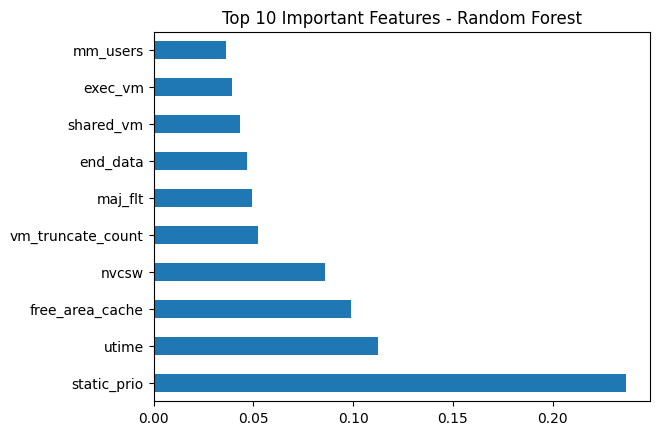

In [ ]:
# Feature importance visualization
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features - Random Forest")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


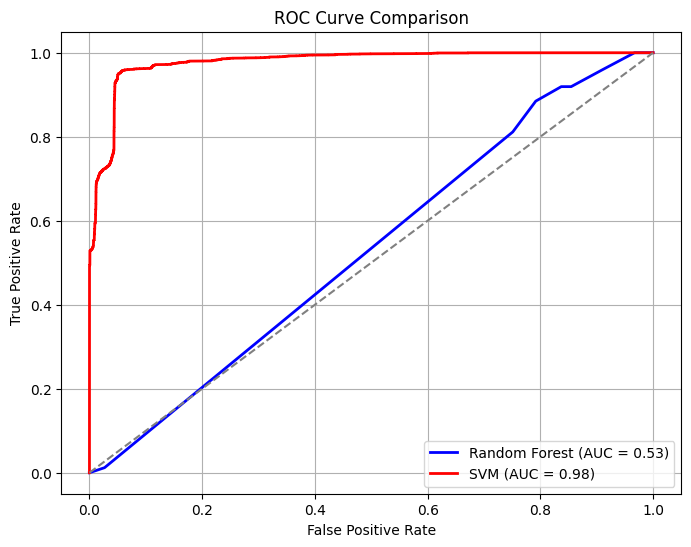

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Binarize the target variable (if necessary)
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

# For Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test_bin, rf_model.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# For SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test_bin, svm_model.decision_function(X_test))
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("ROC Curve Comparison")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
